# Projecte Kaggle: Formula 1 World Championship (1950 - 2022)

### Marina Bermúdez Granados - NIU 1599120


En aquest document està detallada el codi i la memòria tècnica de la tercera pràctica de l’assignatura d’Aprenentatge Computacional. L’objectiu és fer la resolució d'un problema presentat a una Base de Dades, proporcionada per diferents usuaris a la pàgina web *Kaggle*. La base de dades assignada al projecte emmagatzema tota la informació sobre la Formula 1: carreres, conductors, constructors, classificacions, circuits, nombre de voltes i parades a boxers des de 1950 fins a l'any 2022. 

El link a les Bases de Dades és el següent: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020.
<br >El link a el github és el següent: https://github.com/Nara-On/Practica3APC-Kaggle


## Llibreries

In [1]:
import math
import numpy as np
import scipy as sc
import pandas as pd
import sklearn as sk
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

from IPython.display import Image

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

## 1. Bases de Dades

En total, hi ha 14 conjunts d'aprenentatge diferents. Com l'objectiu principal és resoldre un problema, serà millor si totes les dades estan en un mateix conjunt. Per carregar cadascuna i poder seleccionar una, es farà servir la següent funció:

In [2]:
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',', encoding = "ISO-8859-1")
    return dataset

<br >

### <ins>Dataset de circuits</ins>

In [3]:
# Carreguem dataset
circuits = load_dataset('databases/circuits.csv')

print("Dimensionalitat de la BBDD:", circuits.shape)
print("\nTabla de la BBDD:")
display(circuits.head())

Dimensionalitat de la BBDD: (76, 9)

Tabla de la BBDD:


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.761,101.738,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.032,50.511,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,MontmelÃ³,Spain,41.570,2.261,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.952,29.405,130,http://en.wikipedia.org/wiki/Istanbul_Park


<br >

### <ins>Dataset de constructor results</ins>

In [4]:
# Carreguem dataset
constructor_results = load_dataset('databases/constructor_results.csv')

print("Dimensionalitat de la BBDD:", constructor_results.shape)
print("\nTabla de la BBDD:")
display(constructor_results.head())

Dimensionalitat de la BBDD: (12080, 5)

Tabla de la BBDD:


,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.000,\N
1,2,18,2,8.000,\N
2,3,18,3,9.000,\N
3,4,18,4,5.000,\N
4,5,18,5,2.000,\N


<br >

### <ins>Dataset de constructor standings</ins>

In [5]:
# Carreguem dataset
constructor_standings = load_dataset('databases/constructor_standings.csv')

print("Dimensionalitat de la BBDD:", constructor_standings.shape)
print("\nTabla de la BBDD:")
display(constructor_standings.head())

Dimensionalitat de la BBDD: (12841, 7)

Tabla de la BBDD:


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.000,1,1,1
1,2,18,2,8.000,3,3,0
2,3,18,3,9.000,2,2,0
3,4,18,4,5.000,4,4,0
4,5,18,5,2.000,5,5,0


<br >

### <ins>Dataset de constructors</ins>

In [6]:
# Carreguem dataset
constructors = load_dataset('databases/constructors.csv')

print("Dimensionalitat de la BBDD:", constructors.shape)
print("\nTabla de la BBDD:")
display(constructors.head())

Dimensionalitat de la BBDD: (211, 5)

Tabla de la BBDD:


,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


<br >

### <ins>Dataset de driver standings</ins>

In [7]:
# Carreguem dataset
driver_standings = load_dataset('databases/driver_standings.csv')

print("Dimensionalitat de la BBDD:", driver_standings.shape)
print("\nTabla de la BBDD:")
display(driver_standings.head())

Dimensionalitat de la BBDD: (33686, 7)

Tabla de la BBDD:


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.000,1,1,1
1,2,18,2,8.000,2,2,0
2,3,18,3,6.000,3,3,0
3,4,18,4,5.000,4,4,0
4,5,18,5,4.000,5,5,0


<br >

### <ins>Dataset de drivers</ins>

In [8]:
# Carreguem dataset
drivers = load_dataset('databases/drivers.csv')

print("Dimensionalitat de la BBDD:", drivers.shape)
print("\nTabla de la BBDD:")
display(drivers.head())

Dimensionalitat de la BBDD: (854, 9)

Tabla de la BBDD:


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


<br >

### <ins>Dataset de lap times</ins>

In [9]:
# Carreguem dataset
lap_times = load_dataset('databases/lap_times.csv')

print("Dimensionalitat de la BBDD:", lap_times.shape)
print("\nTabla de la BBDD:")
display(lap_times.head())

Dimensionalitat de la BBDD: (528785, 6)

Tabla de la BBDD:


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


<br >

### <ins>Dataset de pit_stops</ins>

In [10]:
# Carreguem dataset
pit_stops = load_dataset('databases/pit_stops.csv')

print("Dimensionalitat de la BBDD:", pit_stops.shape)
print("\nTabla de la BBDD:")
display(pit_stops.head())

Dimensionalitat de la BBDD: (9299, 7)

Tabla de la BBDD:


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


<br >

### <ins>Dataset de qualifying</ins>

In [11]:
# Carreguem dataset
qualifying = load_dataset('databases/qualifying.csv')

print("Dimensionalitat de la BBDD:", qualifying.shape)
print("\nTabla de la BBDD:")
display(qualifying.head())

Dimensionalitat de la BBDD: (9395, 9)

Tabla de la BBDD:


,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


<br >

### <ins>Dataset de races</ins>

In [12]:
# Carreguem dataset
races = load_dataset('databases/races.csv')

print("Dimensionalitat de la BBDD:", races.shape)
print("\nTabla de la BBDD:")
display(races.head())

Dimensionalitat de la BBDD: (1079, 18)

Tabla de la BBDD:


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


<br >

### <ins>Dataset de results</ins>

In [13]:
# Carreguem dataset
results = load_dataset('databases/results.csv')

print("Dimensionalitat de la BBDD:", results.shape)
print("\nTabla de la BBDD:")
display(results.head())

Dimensionalitat de la BBDD: (25660, 18)

Tabla de la BBDD:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.000,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.000,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.000,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.000,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.000,58,+18.014,5708630,43,1,1:27.418,218.385,1


<br >

### <ins>Dataset de seasons</ins>

In [14]:
# Carreguem dataset
seasons = load_dataset('databases/seasons.csv')

print("Dimensionalitat de la BBDD:", seasons.shape)
print("\nTabla de la BBDD:")
display(seasons.head())

Dimensionalitat de la BBDD: (73, 2)

Tabla de la BBDD:


,year,url
0,2009,http://en.wikipedia.org/wiki/2009_Formula_One_...
1,2008,http://en.wikipedia.org/wiki/2008_Formula_One_...
2,2007,http://en.wikipedia.org/wiki/2007_Formula_One_...
3,2006,http://en.wikipedia.org/wiki/2006_Formula_One_...
4,2005,http://en.wikipedia.org/wiki/2005_Formula_One_...


<br >

### <ins>Dataset de sprint results</ins>

In [15]:
# Carreguem dataset
sprint_results = load_dataset('databases/sprint_results.csv')

print("Dimensionalitat de la BBDD:", sprint_results.shape)
print("\nTabla de la BBDD:")
display(sprint_results.head())

Dimensionalitat de la BBDD: (100, 16)

Tabla de la BBDD:


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
0,1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
1,2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
2,3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
3,4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
4,5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


<br >

### <ins>Dataset de status</ins>

In [16]:
# Carreguem dataset
status = load_dataset('databases/status.csv')

print("Dimensionalitat de la BBDD:", status.shape)
print("\nTabla de la BBDD:")
display(status.head())

Dimensionalitat de la BBDD: (139, 2)

Tabla de la BBDD:


,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


<br >

### <ins>1.2. Escollir una Base de Dades</ins>

Després de visualitzar tots els arxius, es pot arribar a la conclusió que la Base de Dades està codificada amb SQL per les taules amb identificadors com a claus primàries i per l'existència de taules amb claus foranes. Per entendre millor l'estructura de les taules, s'ha intentat recrear el datagrama corresponent:

![title](images/datagramaBD.png)

<br >

Marcades de color blau estan les taules amb referències externes les quals podrien ser bones candidates. A més a més, es podrien utilitzar atributs d'altres taules en comptes de les claus foranes. D'aquesta manera es pot treballar amb més instàncies i variables. Per començar, es tractarà de ajuntar les taules *sprint_results*, *qualifying*, *constructor_standings*, *pit_stops*, *lap_times* i *driver_standings* amb totes les seves referències externes corresponents.

In [17]:
# Ajuntar taules a sprint_results

sprint = pd.merge(sprint_results, results,  how='left', left_on=['resultId','raceId','driverId','constructorId'], right_on = ['resultId','raceId','driverId','constructorId'])
sprint = pd.merge(sprint, drivers,  how='left', left_on='driverId', right_on = 'driverId')
sprint = pd.merge(sprint, constructors,  how='left', left_on='constructorId', right_on = 'constructorId')
sprint = pd.merge(sprint, races,  how='left', left_on='raceId', right_on = 'raceId')
sprint = pd.merge(sprint, circuits,  how='left', left_on='circuitId', right_on = 'circuitId')

print("Dimensionalitat de la BBDD:", sprint.shape)
print("\nTabla de la BBDD:")
display(sprint.head())

Dimensionalitat de la BBDD: (100, 67)

Tabla de la BBDD:


,resultId,raceId,driverId,constructorId,number_x,grid_x,position_x,positionText_x,positionOrder_x,points_x,...,sprint_date,sprint_time,circuitRef,name,location,country,lat,lng,alt,url_y
0,1,1061,830,9,33,2,1,1,1,3,...,2021-07-17,\N,silverstone,Silverstone Circuit,Silverstone,UK,52.079,-1.017,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
1,2,1061,1,131,44,1,2,2,2,2,...,2021-07-17,\N,silverstone,Silverstone Circuit,Silverstone,UK,52.079,-1.017,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
2,3,1061,822,131,77,3,3,3,3,1,...,2021-07-17,\N,silverstone,Silverstone Circuit,Silverstone,UK,52.079,-1.017,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
3,4,1061,844,6,16,4,4,4,4,0,...,2021-07-17,\N,silverstone,Silverstone Circuit,Silverstone,UK,52.079,-1.017,153,http://en.wikipedia.org/wiki/Silverstone_Circuit
4,5,1061,846,1,4,6,5,5,5,0,...,2021-07-17,\N,silverstone,Silverstone Circuit,Silverstone,UK,52.079,-1.017,153,http://en.wikipedia.org/wiki/Silverstone_Circuit


In [18]:
# Ajuntar taules a qualifying

qualify = pd.merge(qualifying, drivers,  how='left', left_on='driverId', right_on = 'driverId')
qualify = pd.merge(qualify, constructors,  how='left', left_on='constructorId', right_on = 'constructorId')
qualify = pd.merge(qualify, races,  how='left', left_on='raceId', right_on = 'raceId')
qualify = pd.merge(qualify, circuits,  how='left', left_on='circuitId', right_on = 'circuitId')

print("Dimensionalitat de la BBDD:", qualify.shape)
print("\nTabla de la BBDD:")
display(qualify.head())

Dimensionalitat de la BBDD: (9395, 46)

Tabla de la BBDD:


,qualifyId,raceId,driverId,constructorId,number_x,position,q1,q2,q3,driverRef,...,sprint_date,sprint_time,circuitRef,name,location,country,lat,lng,alt,url_y
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714,hamilton,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869,kubica,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079,kovalainen,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178,massa,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236,heidfeld,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [19]:
# Ajuntar taules a constructor_standings

constructorStandings = pd.merge(constructor_standings, constructors,  how='left', left_on='constructorId', right_on = 'constructorId')
constructorStandings = pd.merge(constructorStandings, races,  how='left', left_on='raceId', right_on = 'raceId')
constructorStandings = pd.merge(constructorStandings, circuits,  how='left', left_on='circuitId', right_on = 'circuitId')

print("Dimensionalitat de la BBDD:", constructorStandings.shape)
print("\nTabla de la BBDD:")
display(constructorStandings.head())

Dimensionalitat de la BBDD: (12841, 36)

Tabla de la BBDD:


,constructorStandingsId,raceId,constructorId,points,position,positionText,wins,constructorRef,name_x,nationality,...,sprint_date,sprint_time,circuitRef,name,location,country,lat,lng,alt,url
0,1,18,1,14.000,1,1,1,mclaren,McLaren,British,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,18,2,8.000,3,3,0,bmw_sauber,BMW Sauber,German,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,3,18,3,9.000,2,2,0,williams,Williams,British,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,4,18,4,5.000,4,4,0,renault,Renault,French,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,5,18,5,2.000,5,5,0,toro_rosso,Toro Rosso,Italian,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [20]:
# Ajuntar taules a pit_stops

pitStops = pd.merge(pit_stops, drivers,  how='left', left_on='driverId', right_on = 'driverId')
pitStops = pd.merge(pitStops, races,  how='left', left_on='raceId', right_on = 'raceId')
pitStops = pd.merge(pitStops, circuits,  how='left', left_on='circuitId', right_on = 'circuitId')

print("Dimensionalitat de la BBDD:", pitStops.shape)
print("\nTabla de la BBDD:")
display(pitStops.head())

Dimensionalitat de la BBDD: (9299, 40)

Tabla de la BBDD:


,raceId,driverId,stop,lap,time_x,duration,milliseconds,driverRef,number,code,...,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url
0,841,153,1,1,17:05:23,26.898,26898,alguersuari,\N,ALG,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,841,30,1,1,17:05:52,25.021,25021,michael_schumacher,\N,MSC,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,841,17,1,11,17:20:48,23.426,23426,webber,\N,WEB,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,841,4,1,12,17:22:34,23.251,23251,alonso,14,ALO,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,841,13,1,13,17:24:10,23.842,23842,massa,19,MAS,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [21]:
# Ajuntar taules a lap_times

lapTimes = pd.merge(lap_times, drivers,  how='left', left_on='driverId', right_on = 'driverId')
lapTimes = pd.merge(lapTimes, races,  how='left', left_on='raceId', right_on = 'raceId')
lapTimes = pd.merge(lapTimes, circuits,  how='left', left_on='circuitId', right_on = 'circuitId')

print("Dimensionalitat de la BBDD:", lapTimes.shape)
print("\nTabla de la BBDD:")
display(lapTimes.head())

Dimensionalitat de la BBDD: (528785, 39)

Tabla de la BBDD:


,raceId,driverId,lap,position,time_x,milliseconds,driverRef,number,code,forename,...,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url
0,841,20,1,1,1:38.109,98109,vettel,5,VET,Sebastian,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,841,20,2,1,1:33.006,93006,vettel,5,VET,Sebastian,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,841,20,3,1,1:32.713,92713,vettel,5,VET,Sebastian,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,841,20,4,1,1:32.803,92803,vettel,5,VET,Sebastian,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,841,20,5,1,1:32.342,92342,vettel,5,VET,Sebastian,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [22]:
# Ajuntar taules a driver_standings

driverStandings = pd.merge(driver_standings, drivers,  how='left', left_on='driverId', right_on = 'driverId')
driverStandings = pd.merge(driverStandings, races,  how='left', left_on='raceId', right_on = 'raceId')
driverStandings = pd.merge(driverStandings, circuits,  how='left', left_on='circuitId', right_on = 'circuitId')

print("Dimensionalitat de la BBDD:", driverStandings.shape)
print("\nTabla de la BBDD:")
display(driverStandings.head())

Dimensionalitat de la BBDD: (33686, 40)

Tabla de la BBDD:


,driverStandingsId,raceId,driverId,points,position,positionText,wins,driverRef,number,code,...,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url
0,1,18,1,10.000,1,1,1,hamilton,44,HAM,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,18,2,8.000,2,2,0,heidfeld,\N,HEI,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,3,18,3,6.000,3,3,0,rosberg,6,ROS,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,4,18,4,5.000,4,4,0,alonso,14,ALO,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,5,18,5,4.000,5,5,0,kovalainen,\N,KOV,...,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.850,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


<br >

Amb tots aquests canvis, ara cal examinar totes les opcions per poder fer una decisió. Des d'un inici es pot descartar *sprint_results* per la seva falta de mostres com per poder fer un estudi complet. Per la resta, es netejarà els atributs i es comprovaran els valors nuls en els restants.

Pel que fa a la neteja d'atributs, per cada taula podem eliminar atributs innecessàris. Per començar, es pot quitar els identificadors i les urls. Dels atributs provenents de la taula *drivers*, no fa falta comptar amb *driverRef*, *number*, *forename*, *surname* o *dob*. Totes aquetes dades estan resumides a *code*. Amb *constructors*, també es pot eliminar *constructorRef* i *name* per els mateixos motius. Per *races*, podem eliminar el *name* i *date*, ja que el nom no aporta informació rellevant i ja es conta l'any en un altre atribut. Per últim, a la taula de *circuits* es pot quitar *circuitRef* i *name* perquè no aporten informació, mentre que *location* ja està resumit a *country*.

Per detectar els nuls, molts dels atributs categòrics estan codificats amb \\\N, per poder detectar tots, es passarà aquests valors com a valors nuls de *numpy*

<br >

#### Base de Dades qualifying

In [23]:
print("Informació tipus de dades de la Base de Dades:")
qualify.info()

Informació tipus de dades de la Base de Dades:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9395 entries, 0 to 9394
Data columns (total 46 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   qualifyId       9395 non-null   int64  
 1   raceId          9395 non-null   int64  
 2   driverId        9395 non-null   int64  
 3   constructorId   9395 non-null   int64  
 4   number_x        9395 non-null   int64  
 5   position        9395 non-null   int64  
 6   q1              9387 non-null   object 
 7   q2              9244 non-null   object 
 8   q3              9101 non-null   object 
 9   driverRef       9395 non-null   object 
 10  number_y        9395 non-null   object 
 11  code            9395 non-null   object 
 12  forename        9395 non-null   object 
 13  surname         9395 non-null   object 
 14  dob             9395 non-null   object 
 15  nationality_x   9395 non-null   object 
 16  url_x           9395 non-null  

<br >

Es quiten tots els atributs innecessàris i comprovem els valors nuls:

In [24]:
# Eliminar atributs inecessàris

listAtrEliminar = ['qualifyId', 'raceId', 'driverId', 'constructorId', 'circuitId',
                   'driverRef', 'number_y', 'forename', 'surname', 'dob',
                   'constructorRef', 'name_x', 
                   'name_y', 'date',
                   'circuitRef', 'name', 'location',
                   'url_x', 'url_y']

qualify = qualify.drop(listAtrEliminar, axis=1)
qualify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9395 entries, 0 to 9394
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   number_x       9395 non-null   int64  
 1   position       9395 non-null   int64  
 2   q1             9387 non-null   object 
 3   q2             9244 non-null   object 
 4   q3             9101 non-null   object 
 5   code           9395 non-null   object 
 6   nationality_x  9395 non-null   object 
 7   nationality_y  9395 non-null   object 
 8   year           9395 non-null   int64  
 9   round          9395 non-null   int64  
 10  time           9395 non-null   object 
 11  fp1_date       9395 non-null   object 
 12  fp1_time       9395 non-null   object 
 13  fp2_date       9395 non-null   object 
 14  fp2_time       9395 non-null   object 
 15  fp3_date       9395 non-null   object 
 16  fp3_time       9395 non-null   object 
 17  quali_date     9395 non-null   object 
 18  quali_ti

In [25]:
# Comprovar nuls

for atr in qualify.columns.values:
    qualify.loc[(qualify[atr] == '\\N'), atr] = np.nan
    
print(qualify.isnull().sum()/len(qualify)*100)

number_x         0.000
position         0.000
q1               1.565
q2              46.461
q3              67.068
code            14.114
nationality_x    0.000
nationality_y    0.000
year             0.000
round            0.000
time            23.715
fp1_date        92.560
fp1_time        97.233
fp2_date        92.560
fp2_time        97.233
fp3_date        93.624
fp3_time        97.658
quali_date      92.560
quali_time      97.233
sprint_date     98.936
sprint_time     99.574
country          0.000
lat              0.000
lng              0.000
alt              0.426
dtype: float64


<br >

Amb un nombre tan alt de nuls, s'hauria de treure *fp1_date*, *fp1_time*, *fp2_date*, *fp2_time*, *fp3_date*, *fp3_time*, *quali_date*, *quali_time*, *sprint_date*, *sprint_time* i *q3*. Amb aquests canvis, el conjunt de dades de 9395 instàncies i 14 atributs.

In [26]:
qualify = qualify.drop(['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 
                            'sprint_date', 'sprint_time', 'q3'], axis=1)
display(qualify.head())

,number_x,position,q1,q2,code,nationality_x,nationality_y,year,round,time,country,lat,lng,alt
0,22.000,1.000,1:26.572,1:25.187,HAM,British,British,2008.000,1.000,04:30:00,Australia,-37.850,144.968,10
1,4.000,2.000,1:26.103,1:25.315,KUB,Polish,German,2008.000,1.000,04:30:00,Australia,-37.850,144.968,10
2,23.000,3.000,1:25.664,1:25.452,KOV,Finnish,British,2008.000,1.000,04:30:00,Australia,-37.850,144.968,10
3,2.000,4.000,1:25.994,1:25.691,MAS,Brazilian,Italian,2008.000,1.000,04:30:00,Australia,-37.850,144.968,10
4,3.000,5.000,1:25.960,1:25.518,HEI,German,German,2008.000,1.000,04:30:00,Australia,-37.850,144.968,10


<br >

#### Base de Dades constructor_standings

In [27]:
print("Informació tipus de dades de la Base de Dades:")
constructorStandings.info()

Informació tipus de dades de la Base de Dades:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12841 entries, 0 to 12840
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12841 non-null  int64  
 1   raceId                  12841 non-null  int64  
 2   constructorId           12841 non-null  int64  
 3   points                  12841 non-null  float64
 4   position                12841 non-null  int64  
 5   positionText            12841 non-null  object 
 6   wins                    12841 non-null  int64  
 7   constructorRef          12841 non-null  object 
 8   name_x                  12841 non-null  object 
 9   nationality             12841 non-null  object 
 10  url_x                   12841 non-null  object 
 11  year                    12841 non-null  int64  
 12  round                   12841 non-null  int64  
 13  circuitId               12841 non-null  int6

<br >

Es treu els atributs inecessàris un alte cop:

In [28]:
# Eliminar atributs inecessàris

listAtrEliminar = ['constructorStandingsId', 'raceId', 'constructorId', 'circuitId',
                   'constructorRef', 'name_x', 
                   'name_y', 'date',
                   'circuitRef', 'name', 'location',
                   'url_x', 'url_y', 'url',
                   'positionText']

constructorStandings = constructorStandings.drop(listAtrEliminar, axis=1)
constructorStandings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12841 entries, 0 to 12840
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   points       12841 non-null  float64
 1   position     12841 non-null  int64  
 2   wins         12841 non-null  int64  
 3   nationality  12841 non-null  object 
 4   year         12841 non-null  int64  
 5   round        12841 non-null  int64  
 6   time         12841 non-null  object 
 7   fp1_date     12841 non-null  object 
 8   fp1_time     12841 non-null  object 
 9   fp2_date     12841 non-null  object 
 10  fp2_time     12841 non-null  object 
 11  fp3_date     12841 non-null  object 
 12  fp3_time     12841 non-null  object 
 13  quali_date   12841 non-null  object 
 14  quali_time   12841 non-null  object 
 15  sprint_date  12841 non-null  object 
 16  sprint_time  12841 non-null  object 
 17  country      12841 non-null  object 
 18  lat          12841 non-null  float64
 19  lng 

<br >

Es quiten els nuls:

In [29]:
# Comprovar nuls

for atr in constructorStandings.columns.values:
    constructorStandings.loc[(constructorStandings[atr] == '\\N'), atr] = np.nan
    
print(constructorStandings.isnull().sum()/len(constructorStandings)*100)

points         0.000
position       0.000
wins           0.000
nationality    0.000
year           0.000
round          0.000
time          71.871
fp1_date      97.274
fp1_time      98.988
fp2_date      97.274
fp2_time      98.988
fp3_date      97.664
fp3_time      99.143
quali_date    97.274
quali_time    98.988
sprint_date   99.611
sprint_time   99.844
country        0.000
lat            0.000
lng            0.000
alt            0.156
dtype: float64


<br >

Com el cas anterior, s'hauria de treure *fp1_date*, *fp1_time*, *fp2_date*, *fp2_time*, *fp3_date*, *fp3_time*, *quali_date*, *quali_time*, *sprint_date*, *sprint_time* i *time*. Amb aquests canvis, el conjunt de dades de 12841 instàncies i 10 atributs.

In [30]:
constructorStandings = constructorStandings.drop(['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 
                                                  'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'time'], axis=1)
display(constructorStandings.head())

,points,position,wins,nationality,year,round,country,lat,lng,alt
0,14.000,1.000,1.000,British,2008.000,1.000,Australia,-37.850,144.968,10
1,8.000,3.000,0.000,German,2008.000,1.000,Australia,-37.850,144.968,10
2,9.000,2.000,0.000,British,2008.000,1.000,Australia,-37.850,144.968,10
3,5.000,4.000,0.000,French,2008.000,1.000,Australia,-37.850,144.968,10
4,2.000,5.000,0.000,Italian,2008.000,1.000,Australia,-37.850,144.968,10


<br >

#### Base de dades pit_stops

In [31]:
print("Informació tipus de dades de la Base de Dades:")
pitStops.info()

Informació tipus de dades de la Base de Dades:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9299 entries, 0 to 9298
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   raceId        9299 non-null   int64  
 1   driverId      9299 non-null   int64  
 2   stop          9299 non-null   int64  
 3   lap           9299 non-null   int64  
 4   time_x        9299 non-null   object 
 5   duration      9299 non-null   object 
 6   milliseconds  9299 non-null   int64  
 7   driverRef     9299 non-null   object 
 8   number        9299 non-null   object 
 9   code          9299 non-null   object 
 10  forename      9299 non-null   object 
 11  surname       9299 non-null   object 
 12  dob           9299 non-null   object 
 13  nationality   9299 non-null   object 
 14  url_x         9299 non-null   object 
 15  year          9299 non-null   int64  
 16  round         9299 non-null   int64  
 17  circuitId     9299 non-n

<br >

Es deixa de comptar els inecessàris i es miren els nuls de nou:

In [32]:
# Eliminar atributs inecessàris

listAtrEliminar = ['raceId', 'driverId', 'circuitId',
                   'driverRef', 'number', 'forename', 'surname', 'dob',
                   'name_x', 'date',
                   'circuitRef', 'name_y', 'location',
                   'url_x', 'url_y', 'url']

pitStops = pitStops.drop(listAtrEliminar, axis=1)
pitStops.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9299 entries, 0 to 9298
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stop          9299 non-null   int64  
 1   lap           9299 non-null   int64  
 2   time_x        9299 non-null   object 
 3   duration      9299 non-null   object 
 4   milliseconds  9299 non-null   int64  
 5   code          9299 non-null   object 
 6   nationality   9299 non-null   object 
 7   year          9299 non-null   int64  
 8   round         9299 non-null   int64  
 9   time_y        9299 non-null   object 
 10  fp1_date      9299 non-null   object 
 11  fp1_time      9299 non-null   object 
 12  fp2_date      9299 non-null   object 
 13  fp2_time      9299 non-null   object 
 14  fp3_date      9299 non-null   object 
 15  fp3_time      9299 non-null   object 
 16  quali_date    9299 non-null   object 
 17  quali_time    9299 non-null   object 
 18  sprint_date   9299 non-null 

In [33]:
# Comprovar nuls

for atr in pitStops.columns.values:
    pitStops.loc[(pitStops[atr] == '\\N'), atr] = np.nan
    
print(pitStops.isnull().sum()/len(pitStops)*100)

stop            0.000
lap             0.000
time_x          0.000
duration        0.000
milliseconds    0.000
code            0.000
nationality     0.000
year            0.000
round           0.000
time_y          0.000
fp1_date       86.364
fp1_time       94.946
fp2_date       86.364
fp2_time       94.946
fp3_date       88.612
fp3_time       95.666
quali_date     86.364
quali_time     94.946
sprint_date    97.752
sprint_time    99.279
country         0.000
lat             0.000
lng             0.000
alt             0.591
dtype: float64


<br >

Un altre cop, es quiten tots els atributs amb la majoria de nuls. Al final, el conjunt de dades té 528785 instàncies amb 14 atributs.

In [34]:
pitStops = pitStops.drop(['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 
                                      'sprint_date', 'sprint_time'], axis=1)
display(pitStops.head())

,stop,lap,time_x,duration,milliseconds,code,nationality,year,round,time_y,country,lat,lng,alt
0,1.000,1.000,17:05:23,26.898,26898.000,ALG,Spanish,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
1,1.000,1.000,17:05:52,25.021,25021.000,MSC,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
2,1.000,11.000,17:20:48,23.426,23426.000,WEB,Australian,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
3,1.000,12.000,17:22:34,23.251,23251.000,ALO,Spanish,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
4,1.000,13.000,17:24:10,23.842,23842.000,MAS,Brazilian,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10


<br >

#### Base de dades lap_times

In [35]:
print("Informació tipus de dades de la Base de Dades:")
lapTimes.info()

Informació tipus de dades de la Base de Dades:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 528785 entries, 0 to 528784
Data columns (total 39 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   raceId        528785 non-null  int64  
 1   driverId      528785 non-null  int64  
 2   lap           528785 non-null  int64  
 3   position      528785 non-null  int64  
 4   time_x        528785 non-null  object 
 5   milliseconds  528785 non-null  int64  
 6   driverRef     528785 non-null  object 
 7   number        528785 non-null  object 
 8   code          528785 non-null  object 
 9   forename      528785 non-null  object 
 10  surname       528785 non-null  object 
 11  dob           528785 non-null  object 
 12  nationality   528785 non-null  object 
 13  url_x         528785 non-null  object 
 14  year          528785 non-null  int64  
 15  round         528785 non-null  int64  
 16  circuitId     528785 non-null  int64  
 17  n

<br >

Es neteja el conjunt dels atributs no necessàris:

In [36]:
# Eliminar atributs inecessàris

listAtrEliminar = ['raceId', 'driverId', 'circuitId',
                   'driverRef', 'number', 'forename', 'surname', 'dob',
                   'name_x', 'date',
                   'circuitRef', 'name_y', 'location',
                   'url_x', 'url_y', 'url']

lapTimes = lapTimes.drop(listAtrEliminar, axis=1)
lapTimes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 528785 entries, 0 to 528784
Data columns (total 23 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   lap           528785 non-null  int64  
 1   position      528785 non-null  int64  
 2   time_x        528785 non-null  object 
 3   milliseconds  528785 non-null  int64  
 4   code          528785 non-null  object 
 5   nationality   528785 non-null  object 
 6   year          528785 non-null  int64  
 7   round         528785 non-null  int64  
 8   time_y        528785 non-null  object 
 9   fp1_date      528785 non-null  object 
 10  fp1_time      528785 non-null  object 
 11  fp2_date      528785 non-null  object 
 12  fp2_time      528785 non-null  object 
 13  fp3_date      528785 non-null  object 
 14  fp3_time      528785 non-null  object 
 15  quali_date    528785 non-null  object 
 16  quali_time    528785 non-null  object 
 17  sprint_date   528785 non-null  object 
 18  spri

<br >

Es comprova els valors nuls de nou:

In [37]:
# Comprovar nuls

for atr in lapTimes.columns.values:
    lapTimes.loc[(lapTimes[atr] == '\\N'), atr] = np.nan
    
print(lapTimes.isnull().sum()/len(lapTimes)*100)

lap             0.000
position        0.000
time_x          0.000
milliseconds    0.000
code           12.806
nationality     0.000
year            0.000
round           0.000
time_y         28.547
fp1_date       92.836
fp1_time       97.316
fp2_date       92.836
fp2_time       97.316
fp3_date       93.909
fp3_time       97.780
quali_date     92.836
quali_time     97.316
sprint_date    98.927
sprint_time    99.536
country         0.000
lat             0.000
lng             0.000
alt             0.410
dtype: float64


<br >

Es treu un altre cop els atributs amb majoria de nuls. Al final, queda un conjunt de dades de 13 atributs i 528785 instàncies.

In [38]:
lapTimes = lapTimes.drop(['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 
                                      'sprint_date', 'sprint_time'], axis=1)
display(lapTimes.head())

,lap,position,time_x,milliseconds,code,nationality,year,round,time_y,country,lat,lng,alt
0,1.000,1.000,1:38.109,98109.000,VET,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
1,2.000,1.000,1:33.006,93006.000,VET,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
2,3.000,1.000,1:32.713,92713.000,VET,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
3,4.000,1.000,1:32.803,92803.000,VET,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
4,5.000,1.000,1:32.342,92342.000,VET,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10


<br >

#### Base de dades driver_standings

In [39]:
print("Informació tipus de dades de la Base de Dades:")
driverStandings.info()

Informació tipus de dades de la Base de Dades:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 33686 entries, 0 to 33685
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33686 non-null  int64  
 1   raceId             33686 non-null  int64  
 2   driverId           33686 non-null  int64  
 3   points             33686 non-null  float64
 4   position           33686 non-null  int64  
 5   positionText       33686 non-null  object 
 6   wins               33686 non-null  int64  
 7   driverRef          33686 non-null  object 
 8   number             33686 non-null  object 
 9   code               33686 non-null  object 
 10  forename           33686 non-null  object 
 11  surname            33686 non-null  object 
 12  dob                33686 non-null  object 
 13  nationality        33686 non-null  object 
 14  url_x              33686 non-null  object 
 15  year               3368

<br >

S'eliminen els atributs pertinents i es comprova els valors nuls:

In [40]:
# Eliminar atributs inecessàris

listAtrEliminar = ['driverStandingsId', 'raceId', 'driverId', 'circuitId',
                   'driverRef', 'number', 'forename', 'surname', 'dob',
                   'name_x', 'date',
                   'circuitRef', 'name_y', 'location',
                   'url_x', 'url_y', 'url',
                   'positionText']

driverStandings = driverStandings.drop(listAtrEliminar, axis=1)
driverStandings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33686 entries, 0 to 33685
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   points       33686 non-null  float64
 1   position     33686 non-null  int64  
 2   wins         33686 non-null  int64  
 3   code         33686 non-null  object 
 4   nationality  33686 non-null  object 
 5   year         33686 non-null  int64  
 6   round        33686 non-null  int64  
 7   time         33686 non-null  object 
 8   fp1_date     33686 non-null  object 
 9   fp1_time     33686 non-null  object 
 10  fp2_date     33686 non-null  object 
 11  fp2_time     33686 non-null  object 
 12  fp3_date     33686 non-null  object 
 13  fp3_time     33686 non-null  object 
 14  quali_date   33686 non-null  object 
 15  quali_time   33686 non-null  object 
 16  sprint_date  33686 non-null  object 
 17  sprint_time  33686 non-null  object 
 18  country      33686 non-null  object 
 19  lat 

In [41]:
# Comprovar nuls

for atr in driverStandings.columns.values:
    driverStandings.loc[(driverStandings[atr] == '\\N'), atr] = np.nan
    
print(driverStandings.isnull().sum()/len(driverStandings)*100)

points         0.000
position       0.000
wins           0.000
code          71.840
nationality    0.000
year           0.000
round          0.000
time          77.474
fp1_date      97.860
fp1_time      99.196
fp2_date      97.860
fp2_time      99.196
fp3_date      98.168
fp3_time      99.320
quali_date    97.860
quali_time    99.196
sprint_date   99.691
sprint_time   99.875
country        0.000
lat            0.000
lng            0.000
alt            0.125
dtype: float64


<br >

Al quitar el atributs amb massa valos nuls, queda un conjunt de dades amb 33686 instàncies i 10 atributs.

In [42]:
driverStandings = driverStandings.drop(['fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 
                                      'sprint_date', 'sprint_time', 'time', 'code'], axis=1)
display(driverStandings.head())

,points,position,wins,nationality,year,round,country,lat,lng,alt
0,10.000,1.000,1.000,British,2008.000,1.000,Australia,-37.850,144.968,10
1,8.000,2.000,0.000,German,2008.000,1.000,Australia,-37.850,144.968,10
2,6.000,3.000,0.000,German,2008.000,1.000,Australia,-37.850,144.968,10
3,5.000,4.000,0.000,Spanish,2008.000,1.000,Australia,-37.850,144.968,10
4,4.000,5.000,0.000,Finnish,2008.000,1.000,Australia,-37.850,144.968,10


<br >

### 1.3. Elecció final Base de Dades

Després de tantes modificacions, es recopilarà tots els resultats abans de debatre quina és la millor opció:

In [43]:
# BD qualifying
print("\nDimensionalitat de qualifying:", qualify.shape)
print("Tabla de qualifying:")
display(qualify.head())

# BD constructor_standings
print("\n\n\nDimensionalitat de constructor_standings:", constructorStandings.shape)
print("Tabla de constructorStandings:")
display(constructorStandings.head())

#BD pit_stops
print("\n\n\nDimensionalitat de pit_stops:", pitStops.shape)
print("Tabla de pit_stops:")
display(pitStops.head())

#BD lap_times
print("\n\n\nDimensionalitat de lap_times:", lapTimes.shape)
print("Tabla de lap_times:")
display(lapTimes.head())

#BD driver_standings
print("\n\n\nDimensionalitat de driver_standings:", driverStandings.shape)
print("Tabla de driver_standings:")
display(driverStandings.head())


Dimensionalitat de qualifying: (9395, 14)
Tabla de qualifying:


,number_x,position,q1,q2,code,nationality_x,nationality_y,year,round,time,country,lat,lng,alt
0,22.000,1.000,1:26.572,1:25.187,HAM,British,British,2008.000,1.000,04:30:00,Australia,-37.850,144.968,10
1,4.000,2.000,1:26.103,1:25.315,KUB,Polish,German,2008.000,1.000,04:30:00,Australia,-37.850,144.968,10
2,23.000,3.000,1:25.664,1:25.452,KOV,Finnish,British,2008.000,1.000,04:30:00,Australia,-37.850,144.968,10
3,2.000,4.000,1:25.994,1:25.691,MAS,Brazilian,Italian,2008.000,1.000,04:30:00,Australia,-37.850,144.968,10
4,3.000,5.000,1:25.960,1:25.518,HEI,German,German,2008.000,1.000,04:30:00,Australia,-37.850,144.968,10





Dimensionalitat de constructor_standings: (12841, 10)
Tabla de constructorStandings:


,points,position,wins,nationality,year,round,country,lat,lng,alt
0,14.000,1.000,1.000,British,2008.000,1.000,Australia,-37.850,144.968,10
1,8.000,3.000,0.000,German,2008.000,1.000,Australia,-37.850,144.968,10
2,9.000,2.000,0.000,British,2008.000,1.000,Australia,-37.850,144.968,10
3,5.000,4.000,0.000,French,2008.000,1.000,Australia,-37.850,144.968,10
4,2.000,5.000,0.000,Italian,2008.000,1.000,Australia,-37.850,144.968,10





Dimensionalitat de pit_stops: (9299, 14)
Tabla de pit_stops:


,stop,lap,time_x,duration,milliseconds,code,nationality,year,round,time_y,country,lat,lng,alt
0,1.000,1.000,17:05:23,26.898,26898.000,ALG,Spanish,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
1,1.000,1.000,17:05:52,25.021,25021.000,MSC,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
2,1.000,11.000,17:20:48,23.426,23426.000,WEB,Australian,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
3,1.000,12.000,17:22:34,23.251,23251.000,ALO,Spanish,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
4,1.000,13.000,17:24:10,23.842,23842.000,MAS,Brazilian,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10





Dimensionalitat de lap_times: (528785, 13)
Tabla de lap_times:


,lap,position,time_x,milliseconds,code,nationality,year,round,time_y,country,lat,lng,alt
0,1.000,1.000,1:38.109,98109.000,VET,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
1,2.000,1.000,1:33.006,93006.000,VET,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
2,3.000,1.000,1:32.713,92713.000,VET,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
3,4.000,1.000,1:32.803,92803.000,VET,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
4,5.000,1.000,1:32.342,92342.000,VET,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10





Dimensionalitat de driver_standings: (33686, 10)
Tabla de driver_standings:


,points,position,wins,nationality,year,round,country,lat,lng,alt
0,10.000,1.000,1.000,British,2008.000,1.000,Australia,-37.850,144.968,10
1,8.000,2.000,0.000,German,2008.000,1.000,Australia,-37.850,144.968,10
2,6.000,3.000,0.000,German,2008.000,1.000,Australia,-37.850,144.968,10
3,5.000,4.000,0.000,Spanish,2008.000,1.000,Australia,-37.850,144.968,10
4,4.000,5.000,0.000,Finnish,2008.000,1.000,Australia,-37.850,144.968,10


<br >

Com es pot comprovar a les dimensionalitats de les versions, totes tenen suficients instàncies. Les taules que tenen atributs objectius clars són *constructor_standings* i *driver_standings*, tot i que són els que tenen menys atributs. Els objectius de *pit_stops* i *lap_times* podrien ser *milliseconds*, mentre que per *qualifying* podria ser *position*. La que té més valors nuls als atributs restants és *qualifying*.

Tenint en compte tot això, es creu que el millor conjunt de dades amb el que treballar és *pit_stops*, amb l'objectiu de determinar el temps que es triga en fer una parada depenent del circuit, la cursa i el constructor. Fer aquestes parades és molt important a la Formula 1 perquè les rodes dels cotxes es desgasten. Per tant, fer els canvis de manera eficient en el temps és un dels aspectes que es podria predir. Dit d'una altra manera, l'atribut objectiu és *milliseconds*.

In [44]:
dataset = pitStops.copy()
dataset.head()

,stop,lap,time_x,duration,milliseconds,code,nationality,year,round,time_y,country,lat,lng,alt
0,1.000,1.000,17:05:23,26.898,26898.000,ALG,Spanish,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
1,1.000,1.000,17:05:52,25.021,25021.000,MSC,German,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
2,1.000,11.000,17:20:48,23.426,23426.000,WEB,Australian,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
3,1.000,12.000,17:22:34,23.251,23251.000,ALO,Spanish,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10
4,1.000,13.000,17:24:10,23.842,23842.000,MAS,Brazilian,2011.000,1.000,06:00:00,Australia,-37.850,144.968,10


<br >

## 2. Tractament de les dades

Abans de fer la definició del problema a resoldre o analitzar les dades, s'ha d'assegurar que es pot treballar amb el conjunt de dades. Per començar, es farà un tractament dels atributs categòrics i dels valors nuls, i després, comprovar si hi ha outliers o si cal estandarditzar les dades.

<br >

### <ins>2.1. Atributs categòrics i valors nuls</ins>

Abans de fer res, es tornarà a visualitzar els atributs finals:

In [45]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9299 entries, 0 to 9298
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stop          9299 non-null   float64
 1   lap           9299 non-null   float64
 2   time_x        9299 non-null   object 
 3   duration      9299 non-null   object 
 4   milliseconds  9299 non-null   float64
 5   code          9299 non-null   object 
 6   nationality   9299 non-null   object 
 7   year          9299 non-null   float64
 8   round         9299 non-null   float64
 9   time_y        9299 non-null   object 
 10  country       9299 non-null   object 
 11  lat           9299 non-null   float64
 12  lng           9299 non-null   float64
 13  alt           9244 non-null   object 
dtypes: float64(7), object(7)
memory usage: 1.1+ MB


<br >

Dels 14 atributs, la meitat d'ells està emmagatzemat com a un *object*. Per poder fer la conversió a variables numèrique, es comprovarà el rang de tots els atributs:

In [46]:
for atr in dataset.columns.values:
    print("Rang " + atr + ": ", dataset[atr].nunique())
    print(dataset[atr].unique())

Rang stop:  6
[1. 2. 3. 4. 5. 6.]
Rang lap:  74
[ 1. 11. 12. 13. 14. 15. 16. 17. 18. 19. 23. 26. 27. 28. 29. 30. 31. 32.
 36. 35. 37. 38. 41. 40. 42. 48.  3. 10. 20. 22. 24. 25. 34. 39. 43. 44.
 46. 52.  9. 21. 33. 45. 47. 50.  2.  8. 53. 55.  7. 49. 51. 54. 56. 62.
 63. 68. 69. 61. 59. 58.  4.  5.  6. 70. 73. 74. 57. 64. 66. 60. 65. 67.
 72. 78.]
Rang time_x:  7030
['17:05:23' '17:05:52' '17:20:48' ... '16:17:46' '16:20:03' '16:40:35']
Rang duration:  6573
['26.898' '25.021' '23.426' ... '21.167' '28.218' '28.777']
Rang milliseconds:  6573
[26898. 25021. 23426. ... 21167. 28218. 28777.]
Rang code:  66
['ALG' 'MSC' 'WEB' 'ALO' 'MAS' 'BAR' 'VET' 'DIR' 'DAM' 'BUE' 'HEI' 'HAM'
 'PET' 'ROS' 'KOB' 'SUT' 'TRU' 'BUT' 'KOV' 'GLO' 'PER' 'LIU' 'MAL' 'KAR'
 'DLR' 'RIC' 'CHA' 'SEN' 'RAI' 'VER' 'PIC' 'HUL' 'GRO' 'GUT' 'BOT' 'CHI'
 'VDG' 'BIA' 'MAG' 'KVY' 'ERI' 'STE' 'SAI' 'NAS' 'MER' 'RSS' 'WEH' 'PAL'
 'HAR' 'VAN' 'OCO' 'STR' 'GIO' 'GAS' 'LEC' 'SIR' 'KUB' 'ALB' 'NOR' 'RUS'
 'LAT' 'AIT' 'FIT' 'TSU' 

<br >

Es pot observar que *duration* ja està implementat a *milliseconds*, així que s'hauria de treure del conjunt de dades. També es pot observar que les dades *time_x* i *alt* són atributs numèrics, així que es fara la seva conversió a nombres decimals. En concret, *time_x* representa l'hora en la que es fa l'aturada. Per poder fer ús d'aquest atribut, s'ha decidit passar les hores a segons.

In [47]:
# Quitar atribut repetit
dataset = dataset.drop(['duration'], axis=1)


# Modificar time_x a segons
dataset['time_x'] = dataset['time_x'].str.split(":", n=2, expand= False)

hours = pd.to_numeric(dataset['time_x'].str[0], errors='coerce')
minutes = pd.to_numeric(dataset['time_x'].str[1], errors='coerce')
seconds = pd.to_numeric(dataset['time_x'].str[2], errors='coerce')

dataset['time_x'] = (hours * 60 * 60) + (minutes * 60) + seconds
dataset['time_x'] = dataset['time_x'].astype('float64')


# Convertir atribut a numeric
dataset['alt'] = dataset['alt'].astype('float64')

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9299 entries, 0 to 9298
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stop          9299 non-null   float64
 1   lap           9299 non-null   float64
 2   time_x        9299 non-null   float64
 3   milliseconds  9299 non-null   float64
 4   code          9299 non-null   object 
 5   nationality   9299 non-null   object 
 6   year          9299 non-null   float64
 7   round         9299 non-null   float64
 8   time_y        9299 non-null   object 
 9   country       9299 non-null   object 
 10  lat           9299 non-null   float64
 11  lng           9299 non-null   float64
 12  alt           9244 non-null   float64
dtypes: float64(9), object(4)
memory usage: 1017.1+ KB


<br >

Només queden els atributs *code*, *nationality*, *time_y* i *country*, els quals si són atributs categòrics. Per tant, es codificaràn amb *ordinal encoder*.

In [48]:
enc = OrdinalEncoder()

enc.fit(dataset[['code', 'nationality', 'time_y', 'country']])
dataset[['code', 'nationality', 'time_y', 'country']] = enc.transform(dataset[['code', 'nationality', 'time_y', 'country']])

<br >

Amb tots els canvis, el conjunt de dades final queda així:

In [49]:
dataset.head()

,stop,lap,time_x,milliseconds,code,nationality,year,round,time_y,country,lat,lng,alt
0,1.000,1.000,61523.000,26898.000,2.000,21.000,2011.000,1.000,2.000,0.000,-37.850,144.968,10.000
1,1.000,1.000,61552.000,25021.000,38.000,11.000,2011.000,1.000,2.000,0.000,-37.850,144.968,10.000
2,1.000,11.000,62448.000,23426.000,63.000,1.000,2011.000,1.000,2.000,0.000,-37.850,144.968,10.000
3,1.000,12.000,62554.000,23251.000,3.000,21.000,2011.000,1.000,2.000,0.000,-37.850,144.968,10.000
4,1.000,13.000,62650.000,23842.000,35.000,3.000,2011.000,1.000,2.000,0.000,-37.850,144.968,10.000


<br >

Per últim, queda comprovar els valors nuls per tractar-los:

In [50]:
print(dataset.isnull().sum()/len(dataset)*100)

stop           0.000
lap            0.000
time_x         0.000
milliseconds   0.000
code           0.000
nationality    0.000
year           0.000
round          0.000
time_y         0.000
country        0.000
lat            0.000
lng            0.000
alt            0.591
dtype: float64


<br >

Com l'únic atribut amb nuls no arriba ni a l'1%, es pot eliminar les instàncies sense aquest.

In [51]:
# Tractament nulls
dataset = dataset[~dataset['alt'].isnull()]
dataset['alt'] = dataset['alt'].astype('int64')

print(dataset.isnull().sum()/len(dataset)*100)

stop           0.000
lap            0.000
time_x         0.000
milliseconds   0.000
code           0.000
nationality    0.000
year           0.000
round          0.000
time_y         0.000
country        0.000
lat            0.000
lng            0.000
alt            0.000
dtype: float64


### <ins>2.2. Outliers i estandardització</ins>

L'única cosa que queda per tractar és analitzar l'existència d'outliers i si fa falta normalitzar les dades. Amb aquest objectiu, es mira les estadístiques generals i els histogrames dels atributs als datasets. 

In [52]:
dataset.describe()

,stop,lap,time_x,milliseconds,code,nationality,year,round,time_y,country,lat,lng,alt
count,9244.000,9244.000,9244.000,9244.000,9244.000,9244.000,9244.000,9244.000,9244.000,9244.000,9244.000,9244.000,9244.000
mean,1.765,25.141,57233.644,73719.338,33.962,10.631,2015.786,10.001,11.185,13.091,29.902,30.430,202.571
std,0.918,14.520,6466.891,279000.093,18.474,6.515,3.427,5.733,5.798,8.797,23.525,62.528,357.577
min,1.000,1.000,47071.000,12897.000,0.000,0.000,2011.000,1.000,0.000,0.000,-37.850,-99.091,-7.000
25%,1.000,13.000,52823.750,21914.000,19.000,4.000,2013.000,5.000,10.000,5.000,24.467,2.261,7.000
50%,2.000,25.000,55375.500,23545.500,35.000,10.000,2016.000,10.000,10.000,12.000,40.373,14.765,103.000
75%,2.000,36.000,59131.250,26269.000,48.000,16.000,2019.000,15.000,13.000,23.000,45.616,54.603,255.000
max,6.000,78.000,81134.000,3069017.000,65.000,25.000,2022.000,22.000,27.000,28.000,52.389,144.968,2227.000


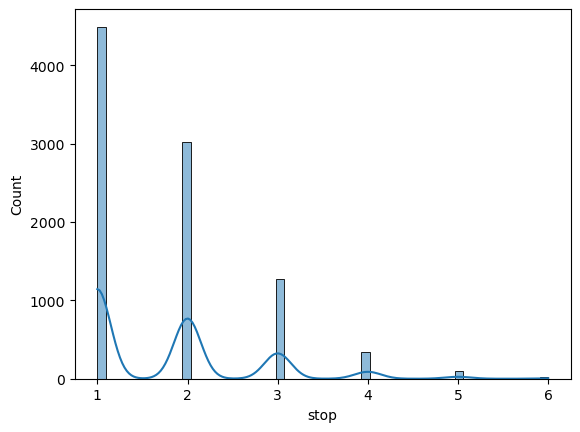

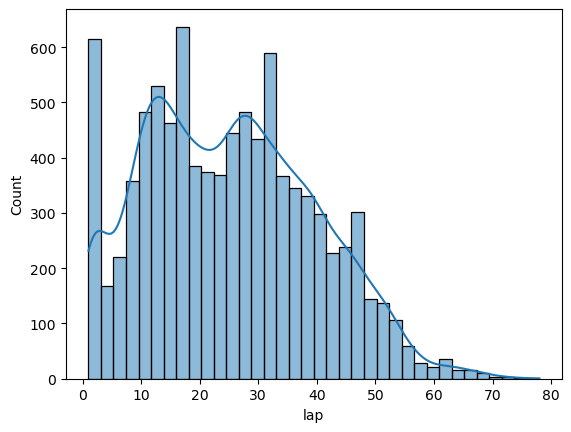

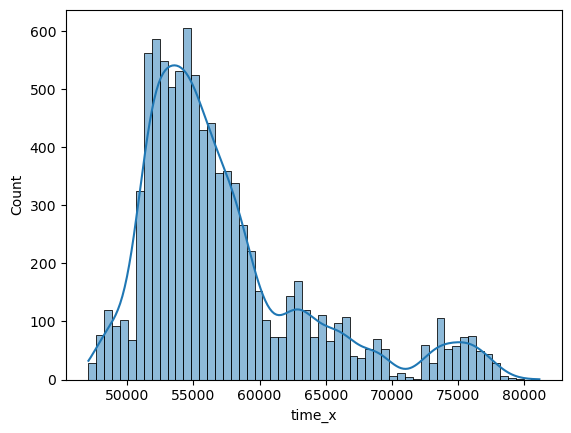

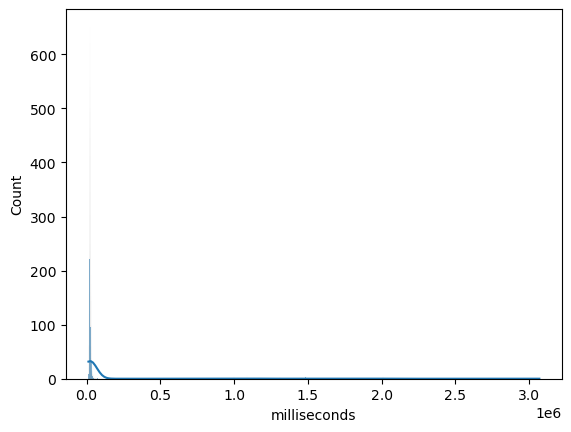

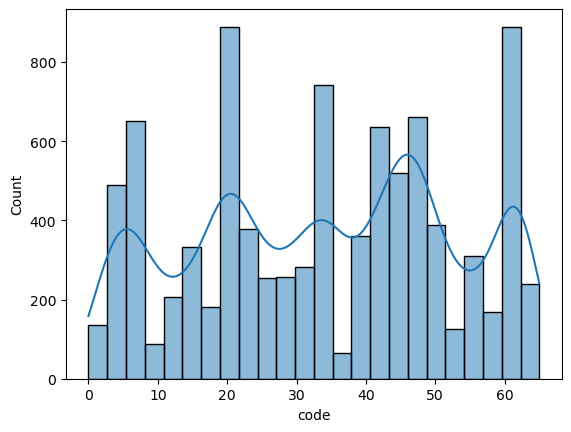

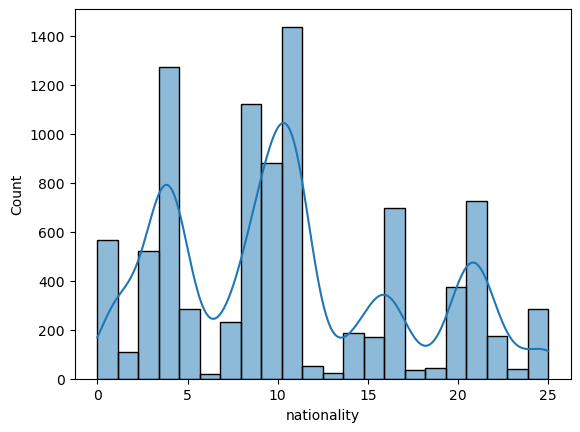

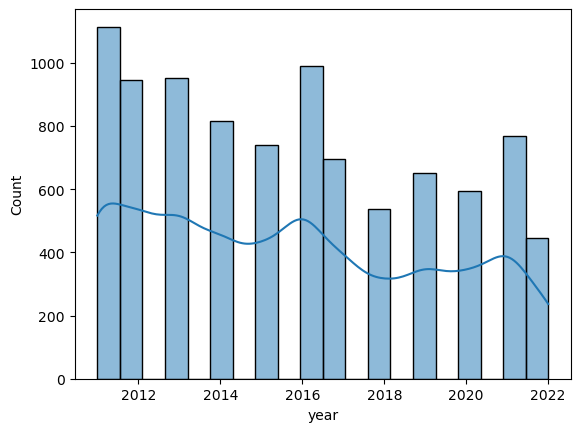

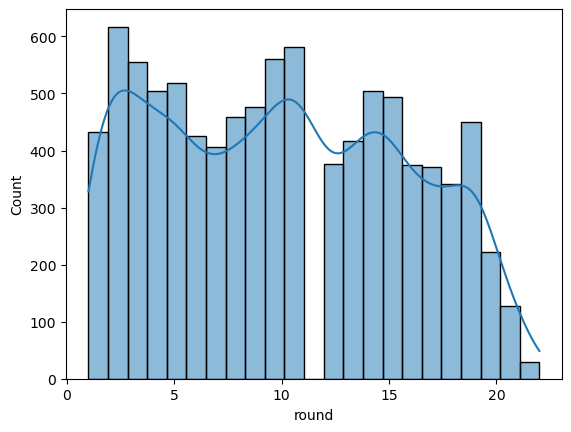

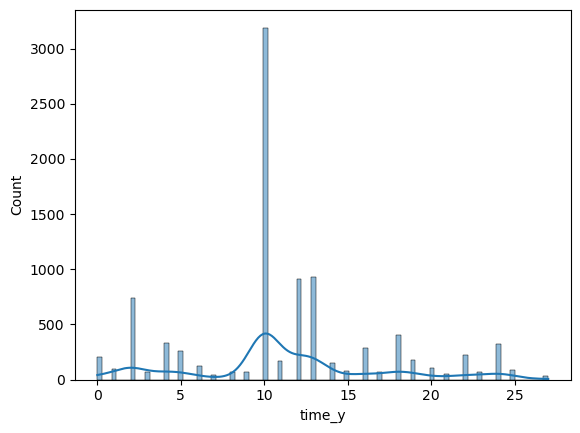

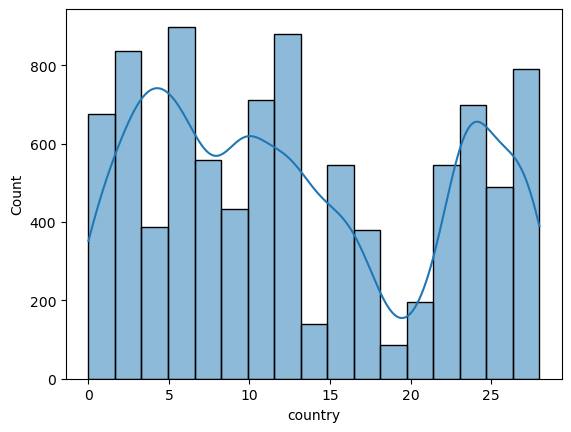

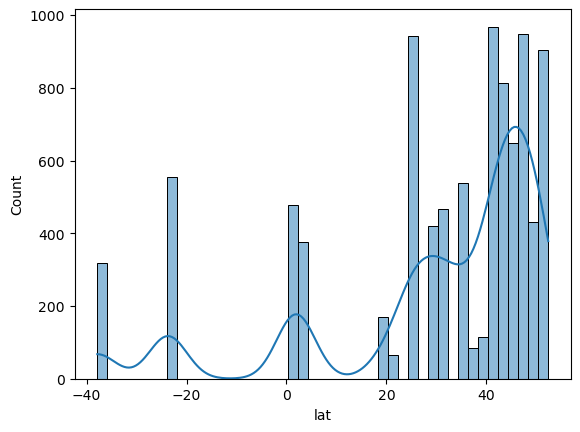

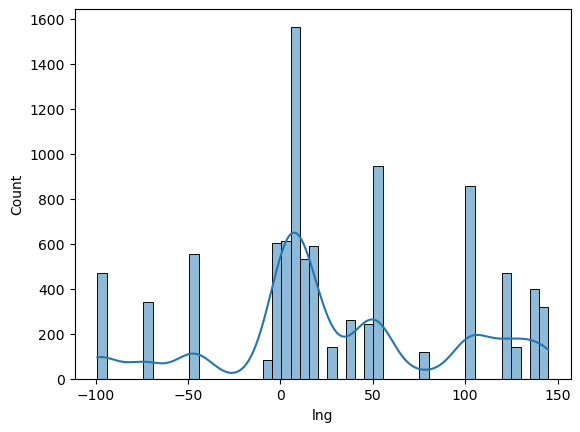

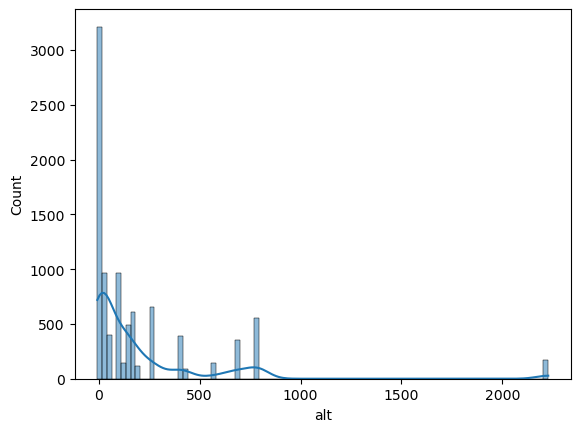

In [53]:
for i in dataset.columns.values:
    sns.histplot(data = dataset, x = i, kde = True)
    plt.show()

<br >

Amb les taules d'estadístiques es pot observar que'ls atributs presenten diferències molt grans entre ells, així que farà falta estandarditzar. Pel que fa als outliers, qualsevol instància ja es corregirà amb l'estandarització.

In [54]:
# Funció per estandaritzar les dades
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

In [55]:
dataset = standarize(dataset)
dataset

,stop,lap,time_x,milliseconds,code,nationality,year,round,time_y,country,lat,lng,alt
0,-0.833,-1.663,0.663,-0.168,-1.730,1.592,-1.397,-1.570,-1.584,-1.488,-2.880,1.832,-0.539
1,-0.833,-1.663,0.668,-0.175,0.219,0.057,-1.397,-1.570,-1.584,-1.488,-2.880,1.832,-0.539
2,-0.833,-0.974,0.806,-0.180,1.572,-1.478,-1.397,-1.570,-1.584,-1.488,-2.880,1.832,-0.539
3,-0.833,-0.905,0.823,-0.181,-1.676,1.592,-1.397,-1.570,-1.584,-1.488,-2.880,1.832,-0.539
4,-0.833,-0.836,0.838,-0.179,0.056,-1.171,-1.397,-1.570,-1.584,-1.488,-2.880,1.832,-0.539
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9294,0.256,1.781,0.217,-0.163,1.680,-0.711,1.813,0.523,0.141,-0.351,0.751,-0.179,0.172
9295,1.345,1.781,0.221,-0.185,1.301,0.671,1.813,0.523,0.141,-0.351,0.751,-0.179,0.172
9296,1.345,1.988,0.243,-0.187,-0.160,0.978,1.813,0.523,0.141,-0.351,0.751,-0.179,0.172
9297,1.345,2.125,0.286,-0.161,-0.214,-0.864,1.813,0.523,0.141,-0.351,0.751,-0.179,0.172


<br >

## 3. Anàlisi de Dades

A l’hora de desenvolupar els models, s’han de conèixer les relacions, patrons i anomalies entre els diferents atributs. Primer es farà una anàlisi de la primera versió del dataset sense les columnes nul·les i una segona amb la interpolació.

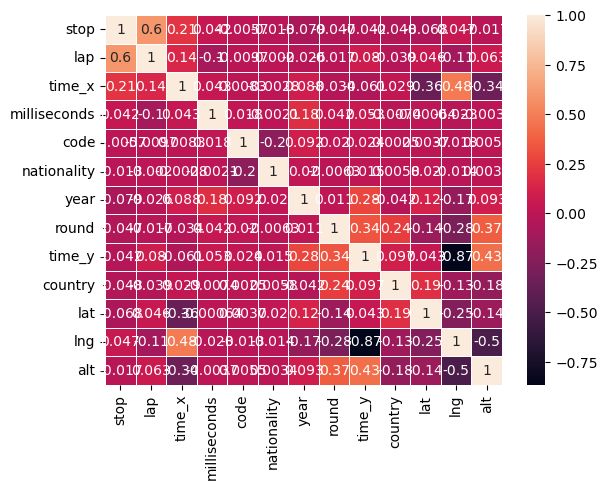

In [56]:
correlacio = dataset.corr()
plt.figure()
ax = sns.heatmap(correlacio, annot=True, linewidths=.5)

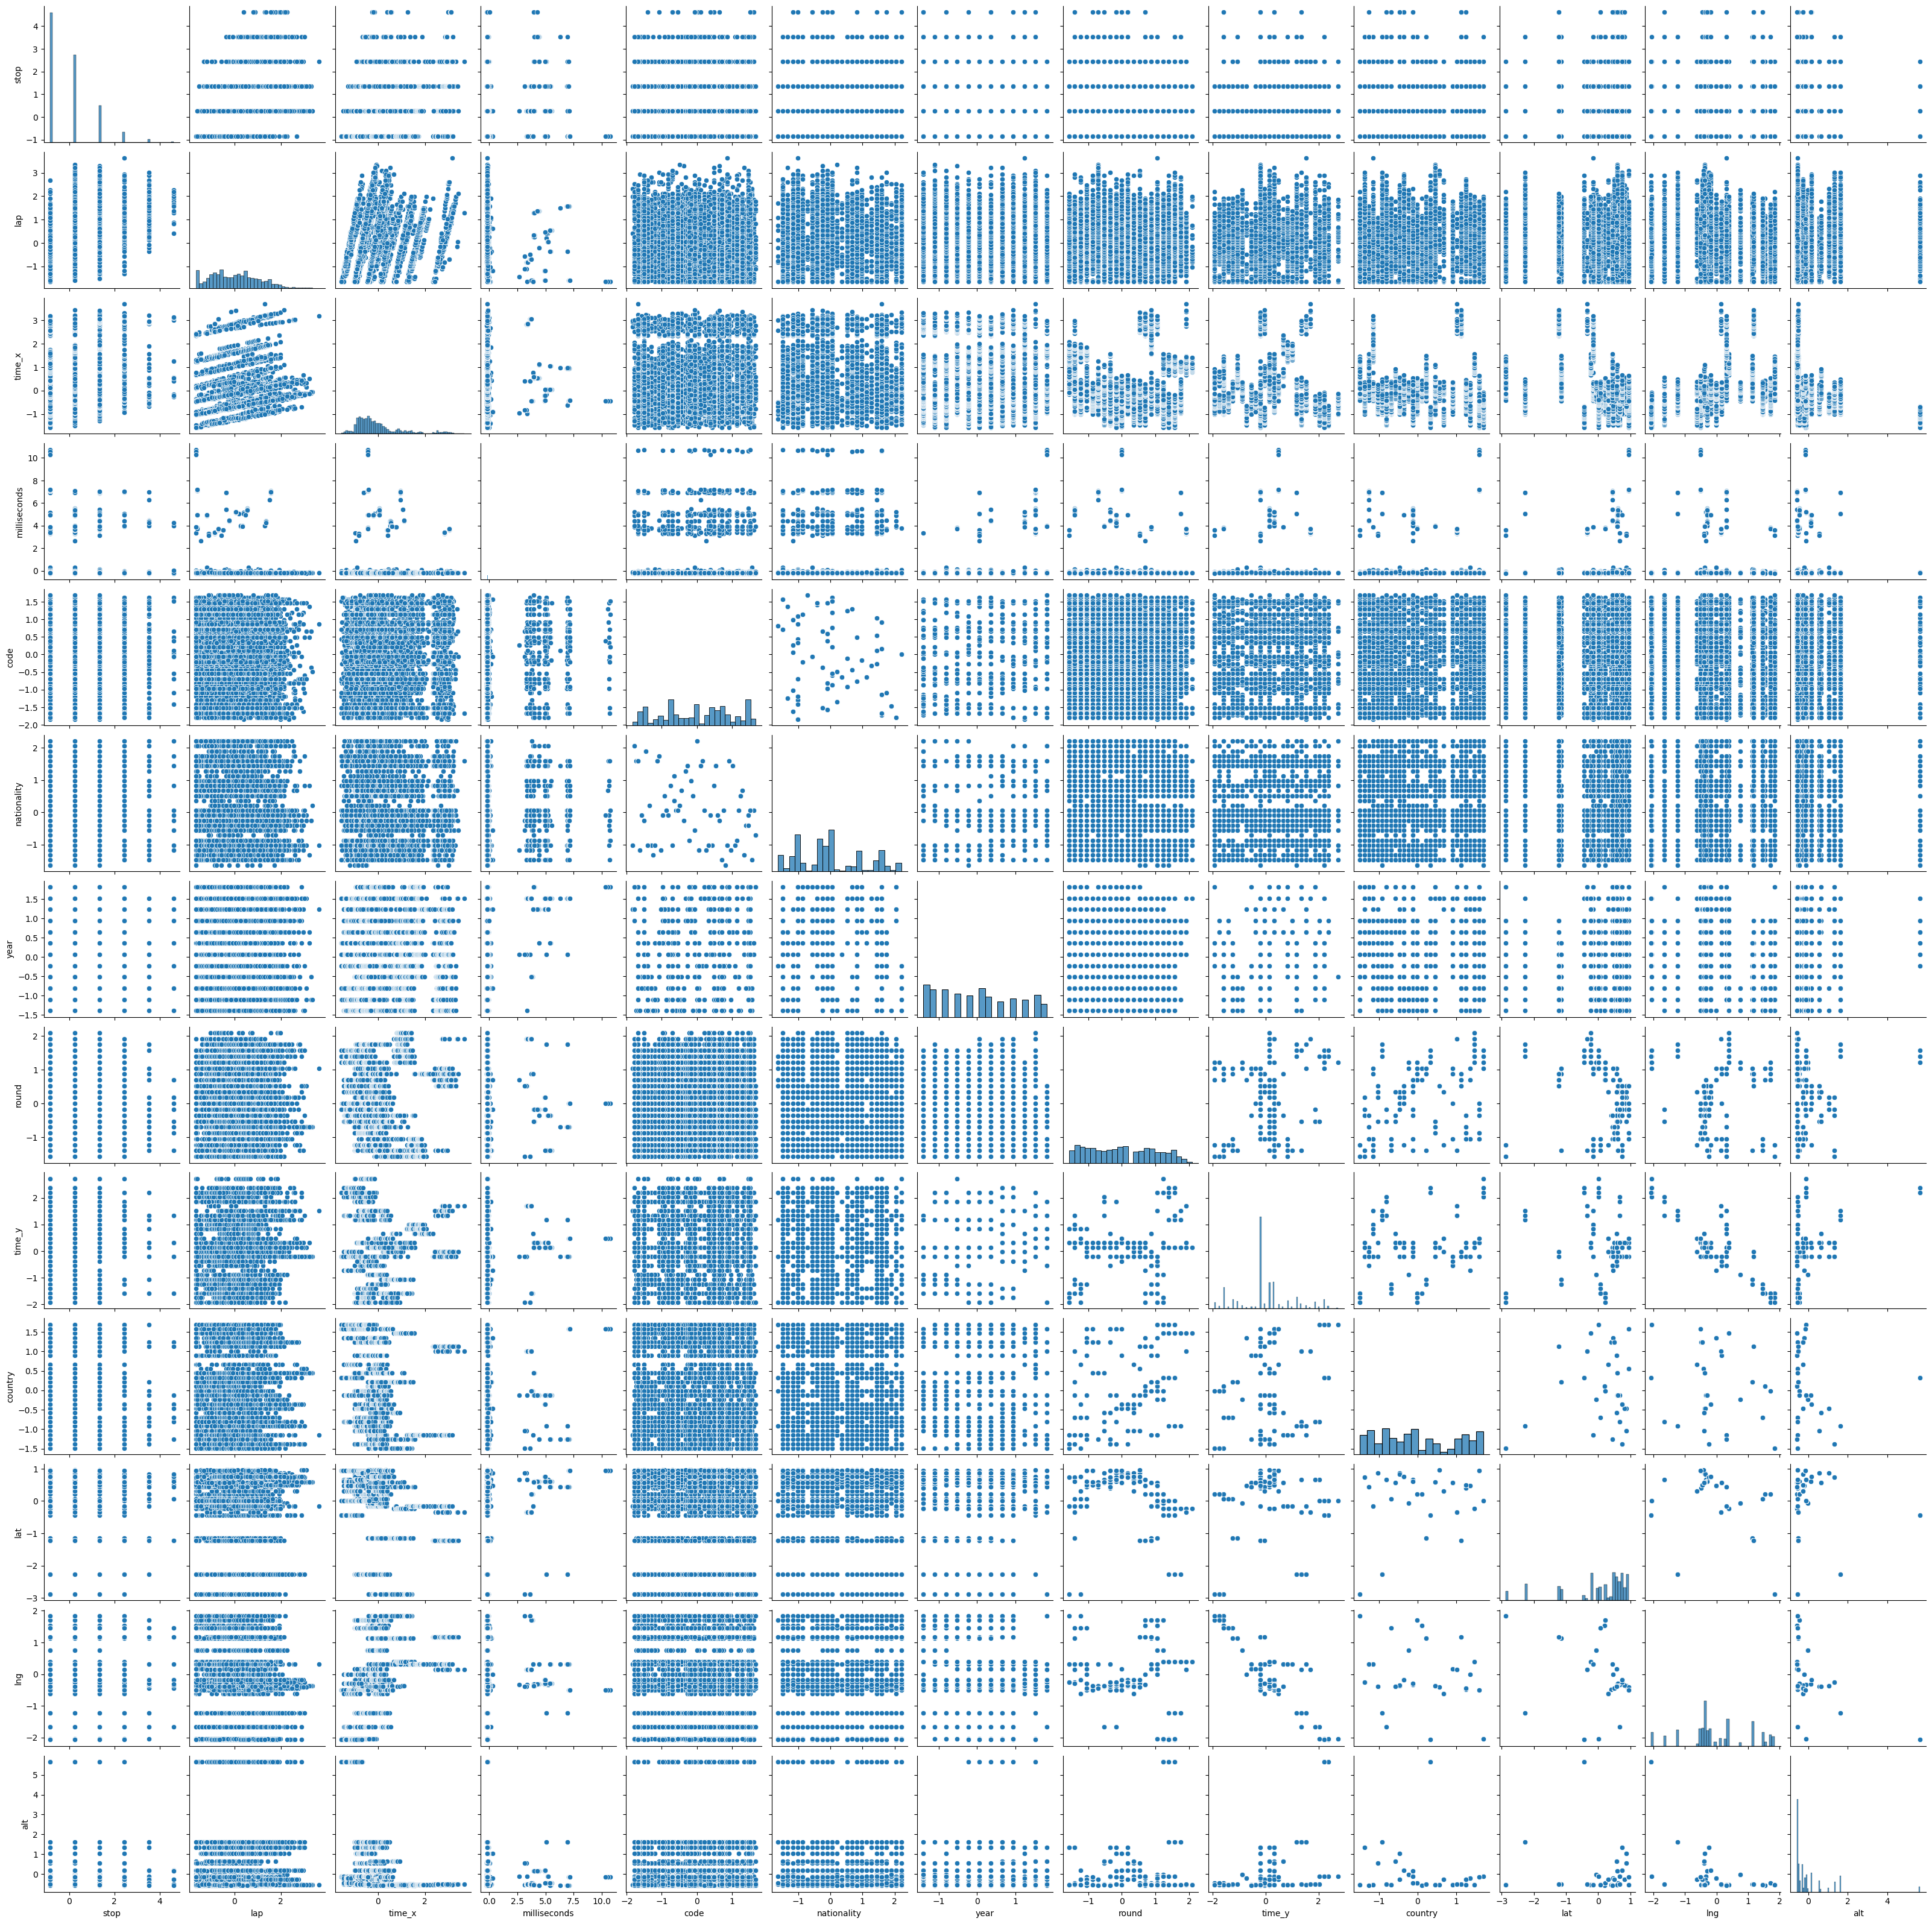

In [57]:
relacio = sns.pairplot(dataset)

<br >

Per les correlacions, no hi ha cap valor que estigui molt correlacionat amb l'atribut objectiu. Tot i això, hi ha correlacions notables amb *lap* i *stop*, amb *time_x* i *lng* i amb *alt* i *time_y*. De tota aquesta informació, es pot concloure que les aturades estan bastant relacionades amb la volta que es fa.

<br >

## 4. Models d'aprenentatge

Amb un atribut objectiu i havent estudiat les dades, ara cal definir models per poder predir el valor amb els altres atributs. Primer es farà una primera separació de les dades entre entrenament i test, per poder aplicar després alguns models.

<br >

### <ins>4.1. Preparacions</ins>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=101)

<br >

### <ins>4.2. Regressió lineal</ins>

In [ ]:
# y = obj, x = atributs

regr = LinearRegression()
regr.fit(x, y)
prediccio = regr.predict(X=atribut1)

In [ ]:
plt.figure()
ax = plt.scatter(x[:,0], y)
plt.plot(atribut1[:,0], prediccio, 'r')

<br >

### <ins> 4.3. Regressió amb K-Nearest Neighbour </ins>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=8)
model.fit(x,y)
pred_y = model.predict(x)

<br >

### <ins> 4.4. Arbres de decisió </ins>

In [ ]:
from sklearn.tree import DecisionTreeRegressor
# Fit regression model
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 1)[:, np.newaxis]
result = regr.predict(X_test)

###

classificador = DecisionTreeClassifier(criterion='entropy', random_state=0)
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)

<br >

### <ins> 4.5. Regressió Random Forest</ins>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=2, random_state=0, shuffle=False)
rfr = RandomForestRegressor(max_depth=3)
rfr.fit(X, y)
rfr.predict([[0, 1, 0, 1]])

##

i = np.argwhere(acc == np.amax(acc))
j = np.argwhere(sco == np.amax(sco))

for i in np.argwhere(acc == np.amax(acc)):
    if i in np.argwhere(sco == np.amax(sco)):
        indexT = i[0]
        break

classificador = RandomForestClassifier(n_estimators=t[indexT], max_features=0.1, random_state=42)
classificador.fit(x_train, y_train)
y_pred = classificador.predict(x_test)

<br >

<ins>4.5. Support Vector Regression</ins>

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)
y_pred = regressor.predict(6.5)
y_pred = sc_y.inverse_transform(y_pred) 

svr = SVR().fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 1)[:, np.newaxis]
svr.predict(X_test)

<br >

### <ins>4.6. Neural Network</ins>

In [ ]:
https://python.plainenglish.io/neural-network-regression-model-with-tensorflow-4a7f18bce7a5
## 2 layers
#Build the neural network
tf.random.set_seed(42)
#create a model
insurance_model=tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"]
)
#fit the model
insurance_model.fit(X_train,y_train,epochs=100)
#check the results with insurnce model test data
insurance_model.evaluate(X_test,y_test)

## 3 layers
#Build the neural network
tf.random.set_seed(42)
#create a model
insurance_model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"]
)
#fit the model
history=insurance_model_2.fit(X_train,y_train,epochs=300)


https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=7, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 
# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

# Defining a function to find the best parameters for ANN
def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=5, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=5, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
 
            MAPE = np.mean(100 * (np.abs(y_test-model.predict(X_test))/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=SearchResultsData.append(pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] ))
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

<br >

## 5. Avaluació dels models

In [ ]:
from sklearn.metrics import mean_squared_error 
def mse(v1, v2):
    return ((v1 - v2)**2).mean()

In [ ]:
def performance(x,y,model):
    predictions = model.predict(x)
    acc = accuracy_score(y, predictions)
    prec = precision_score(y, predictions, average='micro')
    rec = recall_score(y, predictions, average='micro')
    conf_mat = confusion_matrix(y, predictions).T
    
    print(f'Accuracy:{acc}')
    print(f'Precision:{prec}')
    print(f'Recall:{rec}')

    plot_confusion_matrix(model, x, y, normalize=None, cmap='jet')
    return acc, prec, rec, conf_mat

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y, prediccio)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
print("\n",confusion_matrix(y_test,y_pred))
print("\n",classification_report(y_test,y_pred))